## 데이터셋 소개
- 한국어 챗봇 데이터는 거의 없다.
  + 다행히, 한글로도 챗봇을 만들수 있도록 `Chatbot_data_for_Korean v1.0` 데이터셋이다.
- 총 11,876개의 데이터로 구성돼 있다.
  + 각 데이터는 질문과 그에 대한 대답, 그리고 주제에 대한 라벨값을 가진다.
    * 0은 일상 대화, 1은 긍정, 2는 부정의 주제를 의미한다.

## 데이터 분석
- 챗봇 데이터를 분석해보자.
- 데이터 출처: https://github.com/songys/Chatbot_data


### 구글 코랩과 구글 드라이브 연동
- 우선 데이터가 있는 폴더와 연동한다.

In [2]:
from google.colab import drive # 패키지 불러오기
from os.path import join

ROOT = "/content/drive"     # 드라이브 기본 경로
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)           # 드라이브 기본 경로 Mount

MY_GOOGLE_DRIVE_PATH = '/content/drive/MyDrive/Colab Notebooks/2024/알파코/nlp/before_transformer/' # 프로젝트 경로
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH) # 프로젝트 경로
print(PROJECT_PATH)

/content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/2024/알파코/nlp/before_transformer/


In [3]:
%cd "{PROJECT_PATH}"

/content/drive/MyDrive/Colab Notebooks/2024/알파코/nlp/before_transformer


### 데이터 불러오기 및 확인
- Pandas 라이브러리를 활용한다.

In [4]:
import pandas as pd
DATA_IN_PATH = "./data_in/"
data = pd.read_csv(DATA_IN_PATH + './ChatBotData.csv', encoding='utf-8')
data.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


## 데이터 분석
- 이제 데이터 분석을 진행해보자.
- 먼저 데이터의 길이를 분석하기 위해 두 데이터를 하나의 리스트로 만든다.

In [5]:
sentences = list(data['Q']) + list(data['A'])
print(sentences[0])

12시 땡!


### 분석 기준
- 분석 기준은 다음과 같다.
  + 문자 단위의 길이 분석(음절)
  + 단어 단위의 길이 분석(어절)
  + 형태소 단위의 길이 분석
- 음절이란, 문자 하나하나를 생각하면 된다.
- 어절이란, 간단하게 띄어쓰기 단위로 생각하면 된다.
- 형태소 단위의 경우, 어절과 음절 사이라고 생각하면 된다.


### 한글 전처리
- 구글 코랩에서는 매우 쉽게 코드 작업을 할 수 있다.


In [6]:
!apt-get update
!apt-get install g++ openjdk-8-jdk
!pip3 install --target=$my_path konlpy

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,197 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,563 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-sec

### 토크나이징
- 이제 각 기준에 따라 토크나이징을 진행한다.

In [7]:
from konlpy.tag import Okt

tokenized_sentences = [s.split() for s in sentences]
sent_len_by_token = [len(t) for t in tokenized_sentences]
sent_len_by_eumjeol = [len(s.replace(' ', '')) for s in sentences]

okt = Okt()
morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in sentences]
sent_len_by_morph = [len(t) for t in morph_tokenized_sentences]

- 첫번째 우선 띄어쓰기 기준으로 문장을 나눈다.
- 두번째 이 값의 길이를 측정해서 어절의 길이를 측정하고 이 값을 다시 붙여서 길이를 측정해서 음절의 길이로 사용한다.
- 마지막으로 형태소로 나누기 위해 `KoNLPy`에 `Okt` 형태소 분석기를 사용해서 나눈 후 길이를 측정한다.

### 음절, 어절, 형태소 시각화
- 분포에 대한 시각화를 진행해본다.

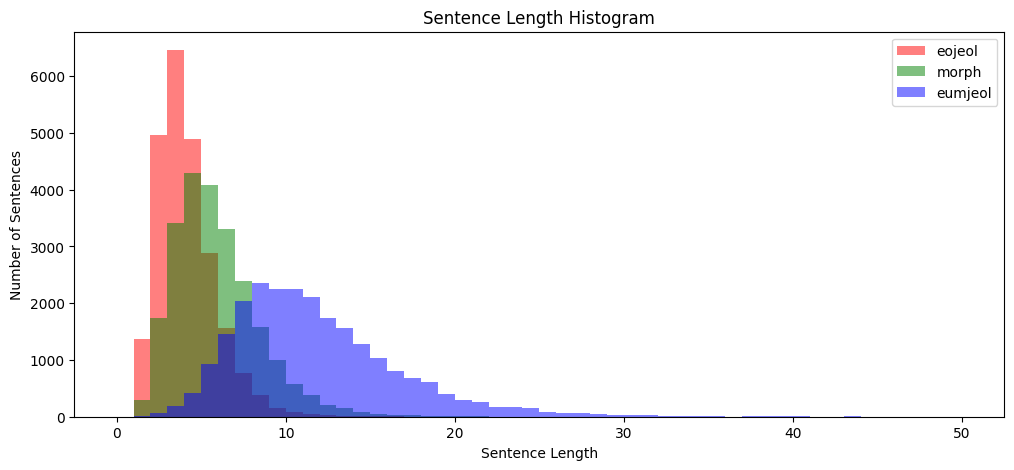

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=50, range=[0,50], alpha=0.5, color= 'r', label='eojeol')
plt.hist(sent_len_by_morph, bins=50, range=[0,50], alpha=0.5, color='g', label='morph')
plt.hist(sent_len_by_eumjeol, bins=50, range=[0,50], alpha=0.5, color='b', label='eumjeol')
plt.title('Sentence Length Histogram')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')
plt.legend()

- 빨간색 히스토드램은 어절 단위애 대한 히스토그램이다.
- 초록색은 형태소, 파란색은 음절이다.
- 위 값을 통해서는 제대로 된 결과치를 뽑기가 어렵기 때문에, y값에 `log`를 취해준다.

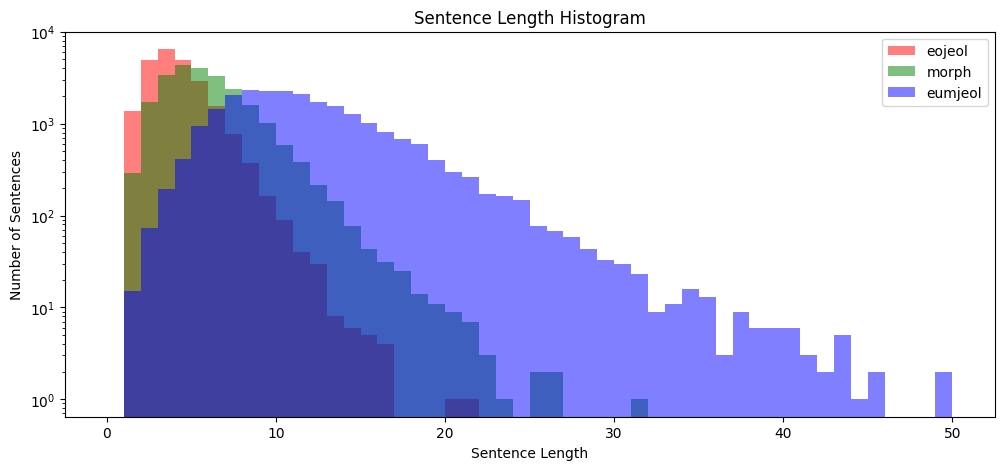

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=50, range=[0,50], alpha=0.5, color= 'r', label='eojeol')
plt.hist(sent_len_by_morph, bins=50, range=[0,50], alpha=0.5, color='g', label='morph')
plt.hist(sent_len_by_eumjeol, bins=50, range=[0,50], alpha=0.5, color='b', label='eumjeol')
plt.yscale('log')
plt.title('Sentence Length Histogram')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')
plt.legend()

- 분포의 꼬리 부분이 어떻게 분포가 되어 있는지 쉽게 확인이 가능하다.
- 이제 각 길이값에 대한 정확한 수치를 뽑도록 한다.

In [10]:
import numpy as np

print('------어절에 대한 통계값------')
print('어절 최대길이: {}'.format(np.max(sent_len_by_token)))
print('어절 최소길이: {}'.format(np.min(sent_len_by_token)))
print('어절 평균길이: {:.2f}'.format(np.mean(sent_len_by_token)))
print('어절 길이 표준편차: {:.2f}'.format(np.std(sent_len_by_token)))
print('어절 중간길이: {}'.format(np.median(sent_len_by_token)))
print('제 1 사분위 길이: {}'.format(np.percentile(sent_len_by_token, 25)))
print('제 3 사분위 길이: {}'.format(np.percentile(sent_len_by_token, 75)))

print('------형태소에 대한 통계값------')
print('형태소 최대길이: {}'.format(np.max(sent_len_by_morph)))
print('형태소 최소길이: {}'.format(np.min(sent_len_by_morph)))
print('형태소 평균길이: {:.2f}'.format(np.mean(sent_len_by_morph)))
print('형태소 길이 표준편차: {:.2f}'.format(np.std(sent_len_by_morph)))
print('형태소 중간길이: {}'.format(np.median(sent_len_by_morph)))
print('형태소 1/4 퍼센타일 길이: {}'.format(np.percentile(sent_len_by_morph, 25)))
print('형태소 3/4 퍼센타일 길이: {}'.format(np.percentile(sent_len_by_morph, 75)))

print('------음절에 대한 통계값------')
print('음절 최대길이: {}'.format(np.max(sent_len_by_eumjeol)))
print('음절 최소길이: {}'.format(np.min(sent_len_by_eumjeol)))
print('음절 평균길이: {:.2f}'.format(np.mean(sent_len_by_eumjeol)))
print('음절 길이 표준편차: {:.2f}'.format(np.std(sent_len_by_eumjeol)))
print('음절 중간길이: {}'.format(np.median(sent_len_by_eumjeol)))
print('음절 1/4 퍼센타일 길이: {}'.format(np.percentile(sent_len_by_eumjeol, 25)))
print('음절 3/4 퍼센타일 길이: {}'.format(np.percentile(sent_len_by_eumjeol, 75)))

------어절에 대한 통계값------
어절 최대길이: 21
어절 최소길이: 1
어절 평균길이: 3.64
어절 길이 표준편차: 1.74
어절 중간길이: 3.0
제 1 사분위 길이: 2.0
제 3 사분위 길이: 5.0
------형태소에 대한 통계값------
형태소 최대길이: 31
형태소 최소길이: 1
형태소 평균길이: 5.41
형태소 길이 표준편차: 2.56
형태소 중간길이: 5.0
형태소 1/4 퍼센타일 길이: 4.0
형태소 3/4 퍼센타일 길이: 7.0
------음절에 대한 통계값------
음절 최대길이: 57
음절 최소길이: 1
음절 평균길이: 11.31
음절 길이 표준편차: 4.98
음절 중간길이: 10.0
음절 1/4 퍼센타일 길이: 8.0
음절 3/4 퍼센타일 길이: 14.0


- 이번에는 박스 플롯을 그려본다.

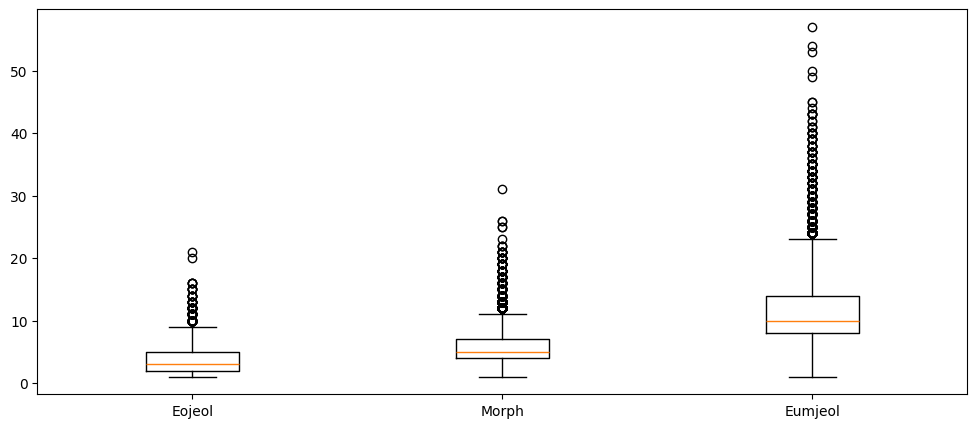

In [11]:
plt.figure(figsize=(12, 5))
plt.boxplot([sent_len_by_token, sent_len_by_morph, sent_len_by_eumjeol],
            labels=['Eojeol', 'Morph', 'Eumjeol'])
plt.show()

- 대체적으로 문장은 5~15의 길이를 중심으로 분포를 이루고 있고, 음절의 경우 길이 분포가 어절과 형태소에 비해 훨씬 더 크다는 점을 알 수 있다.

### 질문, 답변 각각에 대한 문장 길이 분포 분석
- 데이터프레임의 질문 열과 답변 열을 각각 리스트로 정의한 후 `KoNLPy`의 `Okt` 형태소 분석기를 사용한다.

In [12]:
query_sentences = list(data['Q'])
answer_sentences = list(data['A'])

query_morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in query_sentences]
query_sent_len_by_morph = [len(t) for t in query_morph_tokenized_sentences]

answer_morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in answer_sentences]
answer_sent_len_by_morph = [len(t) for t in answer_morph_tokenized_sentences]

- 그 후에 로그 스케일 히스토그램을 적용하여 시각화를 진행하여 조금 더 세심하게 분포를 확인해본다.

Text(0, 0.5, 'Number of Queries')

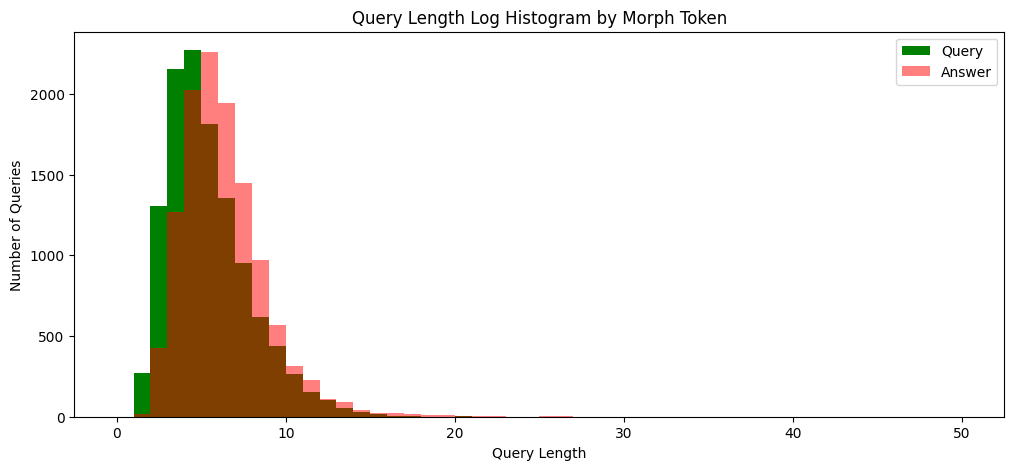

In [14]:
plt.figure(figsize=(12, 5))
plt.hist(query_sent_len_by_morph, bins=50, range=[0,50], color='g', label='Query')
plt.hist(answer_sent_len_by_morph, bins=50, range=[0,50], color='r', alpha=0.5, label='Answer')
plt.legend()
plt.title('Query Length Log Histogram by Morph Token')
plt.xlabel('Query Length')
plt.ylabel('Number of Queries')

- 답변 데이터가 질문 데이터보다 좀 더 이상치 값이 많은 것을 확인할 수 있다.
- 상대적으로 질문의 경우 평균 주변에 잘 분포돼 있음을 확인이 가능하다.
- 이번에는 박스 플롯을 그려본다.

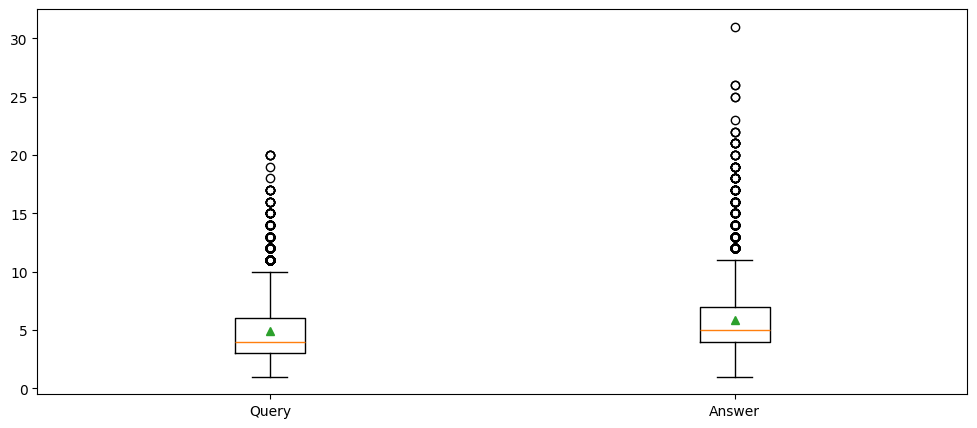

In [15]:
plt.figure(figsize=(12, 5))
plt.boxplot([query_sent_len_by_morph, answer_sent_len_by_morph],
            labels=['Query', 'Answer'],
            showmeans=True)
plt.show()

- 실제 데이터 값을 확인해본다.

In [16]:
print('-----Query-----')
print('형태소 최대길이: {}'.format(np.max(query_sent_len_by_morph)))
print('형태소 최소길이: {}'.format(np.min(query_sent_len_by_morph)))
print('형태소 평균길이: {:.2f}'.format(np.mean(query_sent_len_by_morph)))
print('형태소 길이 표준편차: {:.2f}'.format(np.std(query_sent_len_by_morph)))
print('형태소 중간길이: {}'.format(np.median(query_sent_len_by_morph)))
print('형태소 1/4 퍼센타일 길이: {}'.format(np.percentile(query_sent_len_by_morph, 25)))
print('형태소 3/4 퍼센타일 길이: {}'.format(np.percentile(query_sent_len_by_morph, 75)))

print('-----Answer-----')
print('형태소 최대길이: {}'.format(np.max(answer_sent_len_by_morph)))
print('형태소 최소길이: {}'.format(np.min(answer_sent_len_by_morph)))
print('형태소 평균길이: {:.2f}'.format(np.mean(answer_sent_len_by_morph)))
print('형태소 길이 표준편차: {:.2f}'.format(np.std(answer_sent_len_by_morph)))
print('형태소 중간길이: {}'.format(np.median(answer_sent_len_by_morph)))
print('형태소 1/4 퍼센타일 길이: {}'.format(np.percentile(answer_sent_len_by_morph, 25)))
print('형태소 3/4 퍼센타일 길이: {}'.format(np.percentile(answer_sent_len_by_morph, 75)))

-----Query-----
형태소 최대길이: 20
형태소 최소길이: 1
형태소 평균길이: 4.95
형태소 길이 표준편차: 2.48
형태소 중간길이: 4.0
형태소 1/4 퍼센타일 길이: 3.0
형태소 3/4 퍼센타일 길이: 6.0
-----Answer-----
형태소 최대길이: 31
형태소 최소길이: 1
형태소 평균길이: 5.87
형태소 길이 표준편차: 2.55
형태소 중간길이: 5.0
형태소 1/4 퍼센타일 길이: 4.0
형태소 3/4 퍼센타일 길이: 7.0


### 데이터 어휘 빈도 분석
- 이제 데이터에서 사용되는 단어에 대해 분석해보도록 한다.

In [17]:
okt.pos('오늘밤은유난히덥구나')

[('오늘밤', 'Noun'), ('은', 'Josa'), ('유난히', 'Adverb'), ('덥구나', 'Adjective')]

- 예시 문장을 보면, 각 형태소와 그에 해당하는 품사가 나온다.
- 각 문장에서 명사, 형용사, 동사를 제외한 단어를 모두 제거한 문자열을 만들어 본다.

In [18]:
query_NVA_token_sentences = list()
answer_NVA_token_sentences = list()

for s in query_sentences:
    for token, tag in okt.pos(s.replace(' ', '')):
        if tag == 'Noun' or tag == 'Verb' or tag == 'Adjective':
            query_NVA_token_sentences.append(token)

for s in answer_sentences:
    temp_token_bucket = list()
    for token, tag in okt.pos(s.replace(' ', '')):
        if tag == 'Noun' or tag == 'Verb' or tag == 'Adjective':
            answer_NVA_token_sentences.append(token)

query_NVA_token_sentences = ' '.join(query_NVA_token_sentences)
answer_NVA_token_sentences = ' '.join(answer_NVA_token_sentences)

### 워드클라우드
- 이제 워드 클라우드를 통해 질문과 답변의 의견을 비교해 보도록 한다.

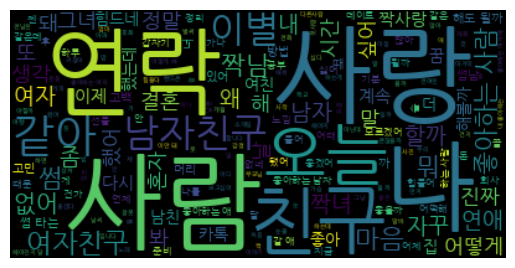

In [19]:
from functools import reduce
from wordcloud import WordCloud
from collections import Counter

query_wordcloud = WordCloud(font_path= DATA_IN_PATH + 'NanumGothic.ttf').generate(query_NVA_token_sentences)

plt.imshow(query_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

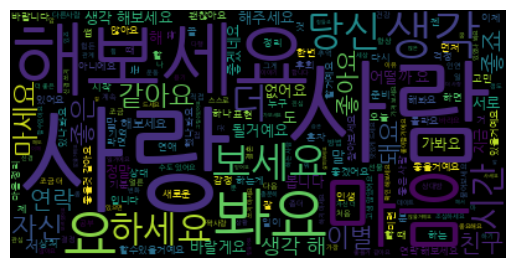

In [20]:
query_wordcloud = WordCloud(font_path= DATA_IN_PATH + 'NanumGothic.ttf').generate(answer_NVA_token_sentences)

plt.imshow(query_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

- 결과에 응답 데이터를 보면, 주로 권유의 문자열이 많이 나오는 것을 확인할 수 있다.